In [1]:
import scanpy as sc
import hdf5plugin
import anndata
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import numpy as np
import pandas as pd
import os

import warnings
warnings.filterwarnings("ignore")

In [2]:
VERSION = "1"

In [3]:
def get_h5ads(directory="./data/h5ad_filt"):
    h5ad_name_lst = []
    for file in os.listdir(directory):
        if file.endswith(".h5ad"):
            # Construct the full file path
            file_path = os.path.join(directory, file)
            # Print the file name
            h5ad_name_lst.append(file)
    return h5ad_name_lst

- Δημιουργούμε μια λίστα με όλα τα επεξεργασμένα h5ad αρχεία

- Τα h5ads περιέχουν anndata objects

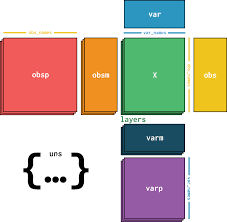

In [4]:
adata_name_lst = get_h5ads()
adata_name_lst

['filtered_GSM4483339.h5ad',
 'filtered_GSM4483340.h5ad',
 'filtered_GSM4483366.h5ad',
 'filtered_GSM4483367.h5ad']

In [5]:
H5ADS = [f"./data/h5ad_filt/{i}" for i in adata_name_lst]

MERGED_NAME = "alzheimer_data_concat"
H5AD_CONCAT = f"./data/h5ad_concat/{MERGED_NAME}_v{VERSION}.h5ad"

In [6]:
H5ADS

['./data/h5ad_filt/filtered_GSM4483339.h5ad',
 './data/h5ad_filt/filtered_GSM4483340.h5ad',
 './data/h5ad_filt/filtered_GSM4483366.h5ad',
 './data/h5ad_filt/filtered_GSM4483367.h5ad']

In [7]:
adatas = [sc.read_h5ad(i) for i in H5ADS]
adatas

[AnnData object with n_obs × n_vars = 4732 × 24337
     obs: 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts'
     var: 'gene_ids', 'feature_types', 'n_cells',
 AnnData object with n_obs × n_vars = 5074 × 23943
     obs: 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts'
     var: 'gene_ids', 'feature_types', 'n_cells',
 AnnData object with n_obs × n_vars = 15157 × 26297
     obs: 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts'
     var: 'gene_ids', 'feature_types', 'n_cells',
 AnnData object with n_obs × n_vars = 12417 × 26326
     obs: 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts'
     var: 'gene_ids', 'feature_types', 'n_cells']

In [8]:
adata_merged = anndata.AnnData.concatenate(*adatas, batch_key='batch', join="inner")
adata_merged

AnnData object with n_obs × n_vars = 37380 × 22915
    obs: 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts', 'batch'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3'

In [9]:
adata_merged.var = adata_merged.var[['gene_ids']]
adata_merged

AnnData object with n_obs × n_vars = 37380 × 22915
    obs: 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts', 'batch'
    var: 'gene_ids'

In [10]:
adata_merged.obs

,condition,n_genes,prc_mt,prc_rb,n_counts,batch
AAACCCACACGGCACT-1-0,control,1275,0.801509,0.047148,2121.0,0
AAACCCACAGGTGTTT-1-0,control,1260,0.616114,0.142180,2110.0,0
AAACCCACATGCCATA-1-0,control,2156,0.819491,0.155039,4515.0,0
AAACCCAGTCTTCGAA-1-0,control,1216,0.047461,0.047461,2107.0,0
AAACCCAGTGTGCTTA-1-0,control,4108,1.931158,0.169870,11185.0,0
...,...,...,...,...,...,...
TTTGTTGGTGTCACAT-1-3,disease,1024,0.282486,0.211864,1416.0,3
TTTGTTGTCATGAGTC-1-3,disease,1411,1.278096,0.308506,2269.0,3
TTTGTTGTCCACGTGG-1-3,disease,3958,0.000000,0.205534,12650.0,3
TTTGTTGTCGTTTACT-1-3,disease,1959,0.026001,0.208008,3846.0,3


In [11]:
adata_merged.obs["batch"].value_counts()

batch
2    15157
3    12417
1     5074
0     4732
Name: count, dtype: int64

In [12]:
adata_merged.write_h5ad(
    H5AD_CONCAT,
    compression=hdf5plugin.FILTERS["zstd"],
    compression_opts=hdf5plugin.Zstd(clevel=5).filter_options
)